In [2]:
import json
import pickle
import networkx as nx

In [4]:
graph = nx.read_gexf('../data/processed/Graph_with_sc_citations.gexf')

In [6]:
print(graph)

Graph with 53897 nodes and 132975 edges


In [31]:
paths = open('../data/processed/paths.json','rb')

In [32]:
path = json.load(paths)

{'jud_path': '../../ada_Judgment_text_citation_correlation/data/processed/big/dict_judgments.pkl'}

In [38]:
file = open(path['jud_path'],'rb')

In [39]:
judg = pickle.load(file)

In [30]:
!pwd

/home2/sisodiya.bhoomendra/github/contrastive_learning/notebook


In [42]:
judg['1579360'].keys()

dict_keys(['title', 'author', 'eq_citation', 'bench', 'meta_data', 'paragraphs', 'citation_sc', 'citation_law', 'citation_other_court', 'citation_msic'])

In [43]:
jud_list = set(judg.keys())

## No of paragraph in a judgement distribution without any preprocessing its distribution 

In [44]:
para_count = []
for jid in jud_list:
    para_count.append(len(judg[jid]['paragraphs']))

In [45]:
len(para_count)

53897

In [48]:
import numpy as np
np_pc = np.array(para_count)

In [50]:
para_len, count = np.unique(np_pc,return_counts=True)

In [51]:
para_len,count

(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
          44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
          55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
          66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
          77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
          88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
          99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
         110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,
         121,  122,  123,  124,  125,  126,  127,  128,  129,  130,  131,
         132,  133,  134,  135,  136,  137,  138,  139,  140,  141,  142,
         143,  144,  145,  146,  147, 

In [54]:
np.sum(np_pc)

1247518

In [58]:
np.sum(count)

53897

In [65]:
for x in range(0,393,5):
    print(para_len[x],end=' : ')
    print(f"Percentage covrage :{round(np.sum(count[:x])/53897 ,3)} , Left Cases: {53897 - np.sum(count[:x])}")

0 : Percentage covrage :0.0 , Left Cases: 53897
5 : Percentage covrage :0.147 , Left Cases: 45951
10 : Percentage covrage :0.339 , Left Cases: 35603
15 : Percentage covrage :0.504 , Left Cases: 26737
20 : Percentage covrage :0.632 , Left Cases: 19854
25 : Percentage covrage :0.723 , Left Cases: 14933
30 : Percentage covrage :0.787 , Left Cases: 11491
35 : Percentage covrage :0.834 , Left Cases: 8973
40 : Percentage covrage :0.867 , Left Cases: 7170
45 : Percentage covrage :0.892 , Left Cases: 5795
50 : Percentage covrage :0.911 , Left Cases: 4817
55 : Percentage covrage :0.925 , Left Cases: 4058
60 : Percentage covrage :0.936 , Left Cases: 3437
65 : Percentage covrage :0.945 , Left Cases: 2948
70 : Percentage covrage :0.953 , Left Cases: 2520
75 : Percentage covrage :0.959 , Left Cases: 2211
80 : Percentage covrage :0.964 , Left Cases: 1956
85 : Percentage covrage :0.968 , Left Cases: 1745
90 : Percentage covrage :0.971 , Left Cases: 1561
95 : Percentage covrage :0.974 , Left Cases: 13

<AxesSubplot: ylabel='Count'>

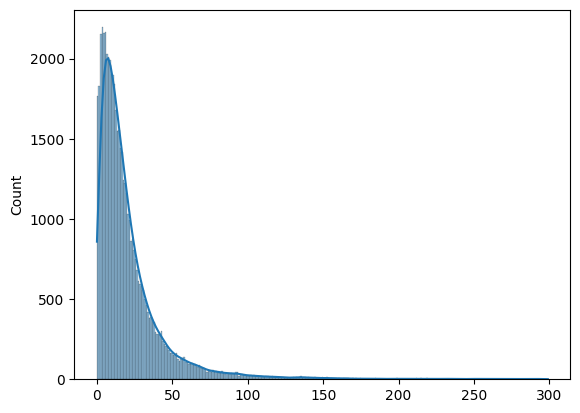

In [68]:
import seaborn as sns
sns.histplot(np_pc[np_pc<300],kde=True)

### Check judgement with less that 3-4 paragraph because that is very low

### Look at the paragraph length distribution 

### threshold on no of words a paragraph whould have to be called as a valid paragraph 

In [71]:
import random
judg[random.sample(jud_list, 1)[0]]['paragraphs']

/tmp/ipykernel_2762/1955667261.py:2: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  judg[random.sample(jud_list, 1)[0]]['paragraphs']


['2. it is the case of the respondents that there was requirement of houses for nearly 8 lakh persons within the reach of common man in delhi. to meet the shortage of housing accommodation, the delhi development authority (dda) sought requisition of the land for its scheme known as "rohini residential scheme" (hereinafter referred to as "the scheme"). the said scheme was initially planned in three phases - phases i, ii, and iii. the three phases in the scheme were developed. even then, the acute shortage of houses in the city of delhi continued. accordingly, the plan for development of rohini phases iv and v was 2 formulated.',
 '3. on the requisition of the dda, on october 27, 1999, a notification under of the land acquisition act, 1894 (for short "the act") was issued indicating that land stated therein was likely to be required by the government of delhi for the public purpose namely; rohini residential scheme, delhi. in the said notification, it was also mentioned that lt. governor

Numder of char in a paragraph

In [ ]:
para_lengths = []
for jid in jud_list:
    for para in judg[jid]['paragraphs']:
        para_lengths.append(len(para))

In [ ]:
len(para_lengths)

1247518

In [74]:
uniq_para,count = np.unique(para_lengths,return_counts=True)

In [77]:
uniq_para.shape

(7434,)

In [79]:
count.shape

(7434,)

In [88]:
for x in range(0,7434,100):
    print(uniq_para[x],end=' : ')
    print(f"Percentage covrage :{round(np.sum(count[:x])/1247518 ,3)} , Left Cases: {1247518 - np.sum(count[:x])}")

24 : Percentage covrage :0.0 , Left Cases: 1247518
147 : Percentage covrage :0.067 , Left Cases: 1164460
247 : Percentage covrage :0.228 , Left Cases: 962668
347 : Percentage covrage :0.356 , Left Cases: 803414
447 : Percentage covrage :0.459 , Left Cases: 675214
547 : Percentage covrage :0.542 , Left Cases: 571644
647 : Percentage covrage :0.609 , Left Cases: 487207
747 : Percentage covrage :0.665 , Left Cases: 417534
847 : Percentage covrage :0.712 , Left Cases: 359439
947 : Percentage covrage :0.751 , Left Cases: 310336
1047 : Percentage covrage :0.784 , Left Cases: 268928
1147 : Percentage covrage :0.813 , Left Cases: 233858
1247 : Percentage covrage :0.837 , Left Cases: 203816
1347 : Percentage covrage :0.857 , Left Cases: 178556
1447 : Percentage covrage :0.874 , Left Cases: 156887
1547 : Percentage covrage :0.889 , Left Cases: 137950
1647 : Percentage covrage :0.903 , Left Cases: 121471
1747 : Percentage covrage :0.914 , Left Cases: 107236
1847 : Percentage covrage :0.924 , Left

In [89]:
para_lengths_word = []
for jid in jud_list:
    for para in judg[jid]['paragraphs']:
        para_lengths_word.append(len(para.split(' ')))
uniq_para,count = np.unique(para_lengths_word,return_counts=True)

In [93]:
count.shape

(1773,)

In [94]:
uniq_para.shape

(1773,)

In [97]:
for x in range(0,1773,20):
    print(uniq_para[x],end=' : ')
    print(f"Percentage covrage :{round(np.sum(count[:x])/1247518 ,3)} , Left Cases: {1247518 - np.sum(count[:x])}")

1 : Percentage covrage :0.0 , Left Cases: 1247518
37 : Percentage covrage :0.179 , Left Cases: 1023819
57 : Percentage covrage :0.339 , Left Cases: 825160
77 : Percentage covrage :0.461 , Left Cases: 672164
97 : Percentage covrage :0.557 , Left Cases: 553187
117 : Percentage covrage :0.632 , Left Cases: 459554
137 : Percentage covrage :0.692 , Left Cases: 384712
157 : Percentage covrage :0.741 , Left Cases: 323356
177 : Percentage covrage :0.781 , Left Cases: 273361
197 : Percentage covrage :0.814 , Left Cases: 232129
217 : Percentage covrage :0.841 , Left Cases: 198135
237 : Percentage covrage :0.864 , Left Cases: 169675
257 : Percentage covrage :0.883 , Left Cases: 146079
277 : Percentage covrage :0.899 , Left Cases: 126006
297 : Percentage covrage :0.913 , Left Cases: 109060
317 : Percentage covrage :0.924 , Left Cases: 94639
337 : Percentage covrage :0.934 , Left Cases: 82292
357 : Percentage covrage :0.943 , Left Cases: 71707
377 : Percentage covrage :0.95 , Left Cases: 62587
397 

<AxesSubplot: ylabel='Count'>

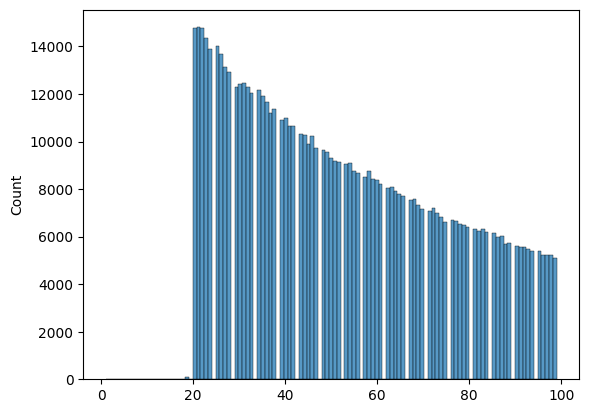

In [101]:
para_lengths_word = np.array(para_lengths_word)

<AxesSubplot: ylabel='Count'>

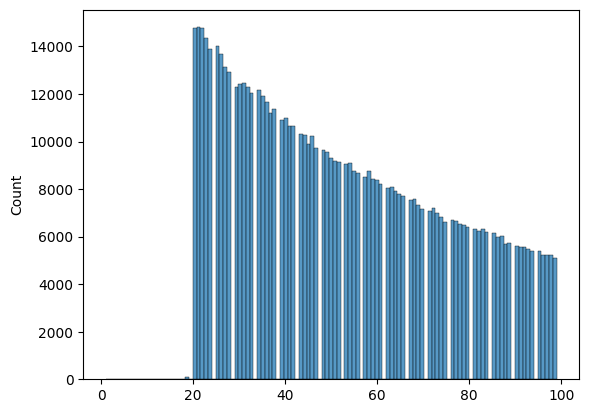

In [102]:
sns.histplot(para_lengths_word[para_lengths_word< 100])

In [103]:
graph

In [104]:
list(jud_list)[:10]

['698529',
 '1711825',
 '600678',
 '960409',
 '1819027',
 '1667953',
 '1612124',
 '40736',
 '1461070',
 '1728300']

In [107]:
from itertools import combinations
  
comb = combinations(jud_list, 2)
for a,b in comb:
    print(a,b,type(a))
    break

698529 1711825 <class 'str'>
